# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [6]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [119]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = "pk.eyJ1IjoicmFjaGVsc29sb21vbiIsImEiOiJjazlhanBlMjgyNGI4M2htc29lMWlvaXJwIn.YfDQ2WR4VS8KopMNnQqlrQ"

## Load Data

In [120]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [24]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units_grp = (
    sfo_data[["housing_units"]]
    .groupby("year")
    .mean()
    .reset_index()
)
housing_units_grp.head()

,year,housing_units
0,2010,372560
1,2011,374507
2,2012,376454
3,2013,378401
4,2014,380348


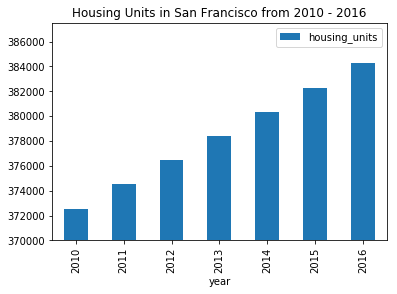

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [29]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

housing_units_grp.plot.bar(x="year", y="housing_units")
plt.title("Housing Units in San Francisco from 2010 - 2016")
plt.ylim((370000,387500))
plt.show()
plt.close(housing_units_grp)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [40]:
# Calculate the average gross rent and average sale price per square foot
rent_sales_grp = (
    sfo_data[["sale_price_sqr_foot", "gross_rent"]]
    .groupby("year")
    .mean()
    .reset_index()
)
rent_sales_grp.head()

,year,sale_price_sqr_foot,gross_rent
0,2010,369.344353,1239
1,2011,341.903429,1530
2,2012,399.389968,2324
3,2013,483.600304,2971
4,2014,556.277273,3528


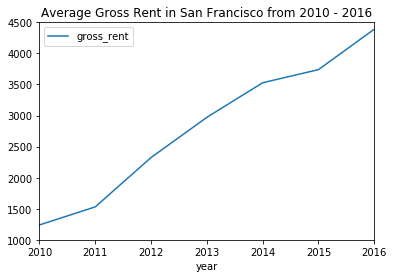

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [43]:
# Plot the Average Gross Rent per Year as a Line Chart 

rent_sales_grp.plot.line(x="year", y="gross_rent")
plt.title("Average Gross Rent in San Francisco from 2010 - 2016")
plt.ylim((1000,4500))
plt.show()
plt.close(rent_sales_grp)

### Average Sales Price per Year

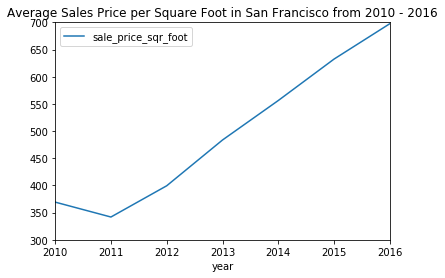

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [45]:
# Plot the Average Sales Price per Year as a line chart

rent_sales_grp.plot.line(x="year", y="sale_price_sqr_foot")
plt.title("Average Sales Price per Square Foot in San Francisco from 2010 - 2016")
plt.ylim((300,700))
plt.show()
plt.close(rent_sales_grp)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [48]:
# Group by year and neighborhood and then create a new dataframe of the mean values

avg_price_grp = (
    sfo_data[["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]]
    .groupby(["year", "neighborhood"])
    .mean()
    .reset_index()
)
avg_price_grp.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [51]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

avg_price_grp.hvplot.line(x="year", y="sale_price_sqr_foot", groupby = "neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [69]:
# Getting the data from the top 10 expensive neighborhoods
neighborhood_grp = (
    sfo_data[["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]]
    .groupby(["neighborhood"])
    .mean()
    .reset_index()
)
neighborhood_grp = neighborhood_grp.sort_values("sale_price_sqr_foot", ascending = False).reset_index(drop=True)
neighborhood_grp.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [70]:
# Plotting the data from the top 10 expensive neighborhoods

neighborhood_grp[:10].hvplot.bar(x="neighborhood", y="sale_price_sqr_foot")

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

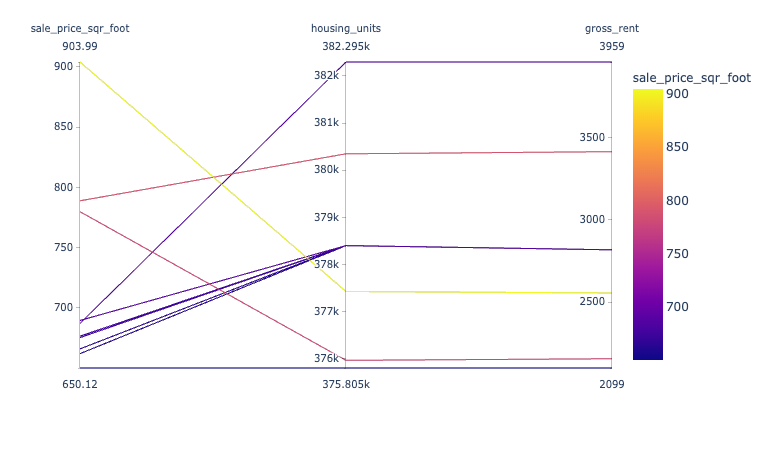

In [71]:
# Parallel Coordinates Plot

px.parallel_coordinates(neighborhood_grp[:10], color="sale_price_sqr_foot")

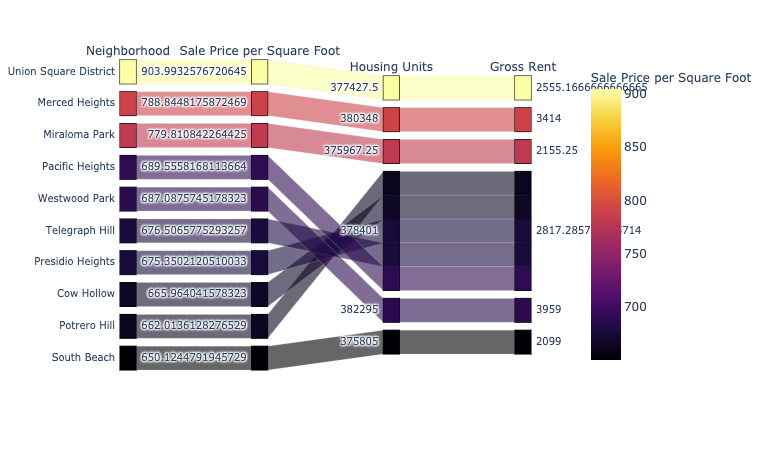

In [75]:
#Parallel Categories Plot
px.parallel_categories(
    neighborhood_grp[:10],
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sale Price per Square Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [101]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [104]:
neighborhood_grp = neighborhood_grp.sort_values("neighborhood").reset_index(drop=True)
df_neighborhood_locations = df_neighborhood_locations.sort_values("Neighborhood").reset_index(drop=True)
neighborhood_grp.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [94]:
# Calculate the mean values for each neighborhood

neighborhood_grp.sort_values("neighborhood").head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
60,Alamo Square,366.020712,378401.0,2817.285714
58,Anza Vista,373.382198,379050.0,3031.833333
70,Bayview,204.588623,376454.0,2318.400000
15,Bayview Heights,590.792839,382295.0,3739.000000
18,Bernal Heights,576.746488,379374.5,3080.333333


In [113]:
# Join the average values with the neighborhood locations

neighborhood_grp['Lat'] = df_neighborhood_locations['Lat']
neighborhood_grp['Lon'] = df_neighborhood_locations['Lon']
neighborhood_grp.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,37.728630,-122.443050


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [117]:
# Create a scatter mapbox to analyze neighborhood info

# Extract token
mapbox_token = "pk.eyJ1IjoicmFjaGVsc29sb21vbiIsImEiOiJjazlhanBlMjgyNGI4M2htc29lMWlvaXJwIn0.YfDQ2WR4VS8KopMNnQqlrQ"

# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)

In [116]:
px.scatter_mapbox(neighborhood_grp, lat="Lat", lon="Lon", size="sale_price_sqr_foot", color="gross_rent")

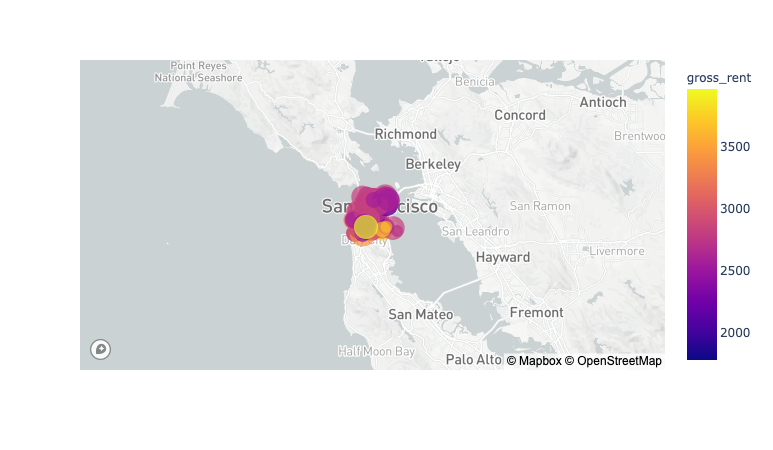

In [118]:
px.scatter_mapbox(
    neighborhood_grp,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
)